## Why do manually added EuroVoc concepts not get returned by SETA?

- [ ]  Is it because the metadata is in the top k similar documents, where k > 10?
- [ ]  Is it because they were not used before 2019?

## Part  : get & save metadata from Cellar

In [66]:
%load_ext autoreload
%autoreload 2

import sys, os
module_path = os.path.abspath(os.getcwd() + '/../..')
if module_path not in sys.path:
    sys.path.append(module_path) 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
# convert to dataframe
import pandas as pd
# import df from pickle in "/home/cellar_seta/notebooks/correct_feedbacks/output/corrected_feedback.pkl"
df = pd.read_pickle("/home/cellar_seta/notebooks/correct_feedbacks/output/corrected_feedback.pkl")
df.head()


document_id                                      document_text  \
10  KJNA31327ENN  socrates social multi-criteria assessment of e...   
14  KJNA31329ENN  this report presents an assessment of european...   
15  KJNA31334ENN  the high performance liquid chromatography hpl...   
16  KJNA31346ENN  this joint research centre jrc technical repor...   
18  KJNA31331ENN  this report documents the criteria proposed to...   

                               cellar_id  \
10  90d83990-7b6b-11ed-9887-01aa75ed71a1   
14  8ec8609d-7c39-11ed-9887-01aa75ed71a1   
15  a94f0657-7c36-11ed-9887-01aa75ed71a1   
16  8ba3bd75-7c38-11ed-9887-01aa75ed71a1   
18  24ec839c-7f4e-11ed-9887-01aa75ed71a1   

                            selected_eurovoc_concepts  \
10          [1835, 1894, 1895, 2451, 688, 7131, 8466]   
14    [134, 2530, 2680, 2825, 3144, 3535, 4628, 5585]   
15   [2395, 2896, 2919, 2924, 3660, 4426, 5188, 5742]   
16  [1759, 1854, 2479, 2896, 3885, 4635, 4636, 589...   
18               [1534, 2530, 2538, 2896, 3144, 3535]   

    manualy_added_eurovoc_concepts  
10                          [5311]  
14                     [5742, 602]  
15                              []  
16                              []  
18  [1278, c_838aa925, c_98d1408a]

In [ ]:
print("number of documents in corrected feedback: ", len(df))

number of documents in corrected feedback:  173


### Is it because the metadata is in the top k similar documents, where k > 10?
1. merge selected and manually added metadata, to construct feedback data
2. Get matadata from top 10, 20, 30, 40, 50 similar documents
3. Does the manually added metadata appear in the top k similar documents?

In [61]:
# 1. merge selected_eurovoc_concepts and manualy_added_eurovoc_concepts, to construct feedback data
df['feedback_metadata'] = df['selected_eurovoc_concepts'] + df['manualy_added_eurovoc_concepts']

In [62]:
df.sample(5)

document_id                                      document_text  \
4    KH0422027ENN  Insects play a significant role in the functio...   
81   KJNA31210ENN  this report illustrates the activities and out...   
80   KJNA31067ENN  the global covenant of mayors in southeast asi...   
46   KJNA31357ENN  the first community tsunami evacuation exercis...   
137  QBAR23011ENN  euro area inflation differentials the role of ...   

                                cellar_id  \
4    14039058-75ed-11ed-9887-01aa75ed71a1   
81   5fb437ec-9d89-11ed-b508-01aa75ed71a1   
80   ba675820-db0f-11ec-a95f-01aa75ed71a1   
46   781e66b9-92fe-11ed-b508-01aa75ed71a1   
137  3fe4a8a7-a8ff-11ed-b508-01aa75ed71a1   

                             selected_eurovoc_concepts  \
4           [2826, 442765, 5463, 5585, 5676, 664, 865]   
81                       [431, 4619, 4709, 4809, 5585]   
80   [142, 2498, 2792, 2896, 434743, 434786, 5311, ...   
46                 [2919, 3043, 4074, 4075, 413, 6267]   
137                      [1421, 2504, 2510, 335, 6151]   

    manualy_added_eurovoc_concepts  \
4                               []   
81                              []   
80                    [1767, 2858]   
46                          [4580]   
137                             []   

                                     feedback_metadata  
4           [2826, 442765, 5463, 5585, 5676, 664, 865]  
81                       [431, 4619, 4709, 4809, 5585]  
80   [142, 2498, 2792, 2896, 434743, 434786, 5311, ...  
46           [2919, 3043, 4074, 4075, 413, 6267, 4580]  
137                      [1421, 2504, 2510, 335, 6151]

In [63]:
import numpy as np
from collections import defaultdict
from core.helpers import metadata_helper, seta_helper,config_helper
from core.utils import seta_api_utils


In [86]:
def extract_eurovoc_concepts(metadata):
    eurovoc_concepts = []
    for concept in metadata["cdm:work_is_about_concept_eurovoc"]:
        url,score = concept
        eurovoc_concepts.append(url.split("/")[-1])
    return eurovoc_concepts

sources = config_helper.app_config["sources"]

supported_properties = {}
supported_properties["cdm:work_is_about_concept_eurovoc"] = defaultdict(list)

token_json, api_url = seta_api_utils.init_seta_api(force=True)

def headers():
    global token_json, api_url
    token_json, api_url = seta_api_utils.init_seta_api()
    headers_ = {"Authorization": token_json["access_token"]}
    return headers_

In [79]:
top_k = [50]
        #  , 20, 30, 40, 50]
# for k in top_k:
#     df['seta_eurovoc_concepts_'+str(k)] = np.nan

In [ ]:
# 2. Get matadata from top 10, 20, 30, 40, 50 similar documents
# add new column seta_eurovoc_concepts to df_documents



for k in top_k:
    # for each document, get top k similar documents, and extract eurovoc concepts from them
    i = 0
    for index, row in df.iterrows():
        # if is not nan 
        # if not pd.isnull(row['seta_eurovoc_concepts_'+str(k)]):
        #     print("skip : document_id: ", row['document_id'],  "k: ", k)
        #     continue
        i=i+1
        if i < 58:
            continue
        print("document_id: ", row['document_id'],  "i: ", i)
        docs = seta_helper.get_similar_docs_by_content(row['document_text'], k, sources)
        metadata = metadata_helper.extract_from_docs(docs["documents"], supported_properties)
        eurovoc_metadata = extract_eurovoc_concepts(metadata)
        print("index: ", index, "k: ", k, "eurovoc_metadata: ", eurovoc_metadata)
        # break
        df.at[index, 'seta_eurovoc_concepts_'+str(k)] = eurovoc_metadata


In [89]:
# save df to pickle and csv
df.to_pickle("output/eurovoc_top_k_metadata.pkl")
df.to_csv("output/eurovoc_top_k_metadata.csv")

In [ ]:
#  to complete, some row are non in k=30 and 50, not logic, need to check
df.sample(10)

## Part II : Load data & Analysis

In [1]:
# load df from output/eurovoc_top_k_metadata.pkl
import pandas as pd

df = pd.read_pickle("output/eurovoc_top_k_metadata.pkl")

In [2]:
df.sample(3)

document_id                                      document_text  \
34   KJNA31378ENN  the cement industry is a building block of mod...   
101  TQ0322301ENN  despite widely implemented childhood immunisat...   
11   QA0322207ENN  the rise of online sales and marketplaces pose...   

                                cellar_id  \
34   26698fec-9165-11ed-b508-01aa75ed71a1   
101  8ee0c775-a1e2-11ed-b508-01aa75ed71a1   
11   8a7a1640-7b6a-11ed-9887-01aa75ed71a1   

                             selected_eurovoc_concepts  \
34   [1439, 2507, 2896, 2922, 3139, 435061, 5261, 5...   
101                            [1759, 1854, 2923, 758]   
11                [1684, 2836, 3193, 5585, 6089, 7219]   

    manualy_added_eurovoc_concepts  \
34                              []   
101              [1756, 192, 2891]   
11        [c_1138d9d2, c_82916123]   

                                     feedback_metadata  \
34   [1439, 2507, 2896, 2922, 3139, 435061, 5261, 5...   
101           [1759, 1854, 2923, 758, 1756, 192, 2891]   
11   [1684, 2836, 3193, 5585, 6089, 7219, c_1138d9d...   

                              seta_eurovoc_concepts_10  \
34   [2896, 5261, 5993, 6700, 757, 1439, 2507, 2922...   
101  [1759, 1854, 2479, 2594, 3730, 3885, 4636, 758...   
11   [1025, 1161, 1684, 2602, 2804, 2836, 310, 6089...   

                              seta_eurovoc_concepts_20  \
34   [2896, 5261, 5993, 6700, 757, 1439, 2507, 2922...   
101  [1759, 1854, 2479, 2594, 3730, 3885, 4636, 758...   
11   [1025, 1161, 1684, 2602, 2804, 2836, 310, 6089...   

                              seta_eurovoc_concepts_30  \
34   [2896, 5261, 5993, 6700, 757, 1439, 2507, 2922...   
101  [1759, 1854, 2479, 2594, 3730, 3885, 4636, 758...   
11   [1025, 1161, 1684, 2602, 2804, 2836, 310, 6089...   

                              seta_eurovoc_concepts_40  \
34   [2896, 5261, 5993, 6700, 757, 1439, 2507, 2922...   
101  [1759, 1854, 2479, 2594, 3730, 3885, 4636, 758...   
11   [1025, 1161, 1684, 2602, 2804, 2836, 310, 6089...   

                              seta_eurovoc_concepts_50  
34   [2896, 5261, 5993, 6700, 757, 1439, 2507, 2922...  
101  [1759, 1854, 2479, 2594, 3730, 3885, 4636, 758...  
11   [1025, 1161, 1684, 2602, 2804, 2836, 310, 6089...

In [3]:
# count rows where seta_eurovoc_concepts_x is nan
print("number of documents in corrected feedback: ", len(df))
print("number of documents in corrected feedback where seta_eurovoc_concepts_10 is nan: ", df['seta_eurovoc_concepts_10'].isnull().sum())
print("number of documents in corrected feedback where seta_eurovoc_concepts_20 is nan: ", df['seta_eurovoc_concepts_20'].isnull().sum())
print("number of documents in corrected feedback where seta_eurovoc_concepts_30 is nan: ", df['seta_eurovoc_concepts_30'].isnull().sum())
print("number of documents in corrected feedback where seta_eurovoc_concepts_40 is nan: ", df['seta_eurovoc_concepts_40'].isnull().sum())
print("number of documents in corrected feedback where seta_eurovoc_concepts_50 is nan: ", df['seta_eurovoc_concepts_50'].isnull().sum())


number of documents in corrected feedback:  173
number of documents in corrected feedback where seta_eurovoc_concepts_10 is nan:  0
number of documents in corrected feedback where seta_eurovoc_concepts_20 is nan:  0
number of documents in corrected feedback where seta_eurovoc_concepts_30 is nan:  0
number of documents in corrected feedback where seta_eurovoc_concepts_40 is nan:  0
number of documents in corrected feedback where seta_eurovoc_concepts_50 is nan:  0


In [4]:
# total number of eurovoc concepts in each column seta_eurovoc_concepts_x
print("number of documents in corrected feedback: ", len(df))
print("number of eurovoc concepts in seta_eurovoc_concepts_10: ", df['seta_eurovoc_concepts_10'].apply(len).sum())
print("number of eurovoc concepts in seta_eurovoc_concepts_20: ", df['seta_eurovoc_concepts_20'].apply(len).sum())
print("number of eurovoc concepts in seta_eurovoc_concepts_30: ", df['seta_eurovoc_concepts_30'].apply(len).sum())
print("number of eurovoc concepts in seta_eurovoc_concepts_40: ", df['seta_eurovoc_concepts_40'].apply(len).sum())
print("number of eurovoc concepts in seta_eurovoc_concepts_50: ", df['seta_eurovoc_concepts_50'].apply(len).sum())


number of documents in corrected feedback:  173
number of eurovoc concepts in seta_eurovoc_concepts_10:  6790
number of eurovoc concepts in seta_eurovoc_concepts_20:  10860
number of eurovoc concepts in seta_eurovoc_concepts_30:  14413
number of eurovoc concepts in seta_eurovoc_concepts_40:  17624
number of eurovoc concepts in seta_eurovoc_concepts_50:  20652


### Analysis of the metadata

In [102]:
df.sample(3)

document_id                                      document_text  \
11  QA0322207ENN  the rise of online sales and marketplaces pose...   
84  KN0721061ENN  the urban agenda for the eu uaeu represents th...   
85  MJ0322269ENN  executive summary while islands are particular...   

                               cellar_id  \
11  8a7a1640-7b6a-11ed-9887-01aa75ed71a1   
84  353efdd5-9e31-11ed-b508-01aa75ed71a1   
85  1b609b6b-9e33-11ed-b508-01aa75ed71a1   

                          selected_eurovoc_concepts  \
11             [1684, 2836, 3193, 5585, 6089, 7219]   
84  [2516, 431, 4618, 4619, 4709, 4809, 5499, 5585]   
85                    [3638, 4129, 5861, 6700, 754]   

                       manualy_added_eurovoc_concepts  \
11                           [c_1138d9d2, c_82916123]   
84                                                 []   
85  [1182, 1504, 1519, 1589, 2891, 4320, 534, 5563...   

                                    feedback_metadata  \
11  [1684, 2836, 3193, 5585, 6089, 7219, c_1138d9d...   
84    [2516, 431, 4618, 4619, 4709, 4809, 5499, 5585]   
85  [3638, 4129, 5861, 6700, 754, 1182, 1504, 1519...   

                             seta_eurovoc_concepts_10  \
11  [1025, 1161, 1684, 2602, 2804, 2836, 310, 6089...   
84  [2468, 2470, 2517, 3057, 5585, 1223, 221, 2516...   
85  [1488, 1683, 2715, 2917, 4420, 5861, 748, 754,...   

                             seta_eurovoc_concepts_20  \
11  [1025, 1161, 1684, 2602, 2804, 2836, 310, 6089...   
84  [2468, 2470, 2517, 3057, 5585, 1223, 221, 2516...   
85  [1488, 1683, 2715, 2917, 4420, 5861, 748, 754,...   

                             seta_eurovoc_concepts_30  \
11  [1025, 1161, 1684, 2602, 2804, 2836, 310, 6089...   
84  [2468, 2470, 2517, 3057, 5585, 1223, 221, 2516...   
85  [1488, 1683, 2715, 2917, 4420, 5861, 748, 754,...   

                             seta_eurovoc_concepts_40  \
11  [1025, 1161, 1684, 2602, 2804, 2836, 310, 6089...   
84  [2468, 2470, 2517, 3057, 5585, 1223, 221, 2516...   
85  [1488, 1683, 2715, 2917, 4420, 5861, 748, 754,...   

                             seta_eurovoc_concepts_50  \
11  [1025, 1161, 1684, 2602, 2804, 2836, 310, 6089...   
84  [2468, 2470, 2517, 3057, 5585, 1223, 221, 2516...   
85  [1488, 1683, 2715, 2917, 4420, 5861, 748, 754,...   

    seta_eurovoc_concepts_10_match_percentage  
11                                     0.7500  
84                                     1.0000  
85                                     0.3125

In [6]:
def get_matched_eurovoc_concepts_percentage(row, col_name):
    matched_eurovoc_concepts = set(row['feedback_metadata']).intersection(set(row[col_name]))
    if len(row['feedback_metadata']) > 0:
        return len(matched_eurovoc_concepts)/len(row['feedback_metadata'])
    else:
        return 0

In [11]:

top_k = [10,20, 30, 40, 50]
results = {}
for k in top_k:
    df['seta_eurovoc_concepts_'+str(k)+'_match_percentage'] = df.apply(lambda row: get_matched_eurovoc_concepts_percentage(row,'seta_eurovoc_concepts_'+str(k)), axis=1)
    r = df['seta_eurovoc_concepts_'+str(k)+'_match_percentage'].sum()/len(df)
    r = r * 100
    print("Total percentage of concepts matched for sim_docs =  {}: {}".format(k, r))
    results[k] = r

Total percentage of concepts matched for sim_docs =  10: 75.04572418589761
Total percentage of concepts matched for sim_docs =  20: 80.30170295343707
Total percentage of concepts matched for sim_docs =  30: 83.89076081272614
Total percentage of concepts matched for sim_docs =  40: 85.68866586207628
Total percentage of concepts matched for sim_docs =  50: 87.31846509303156


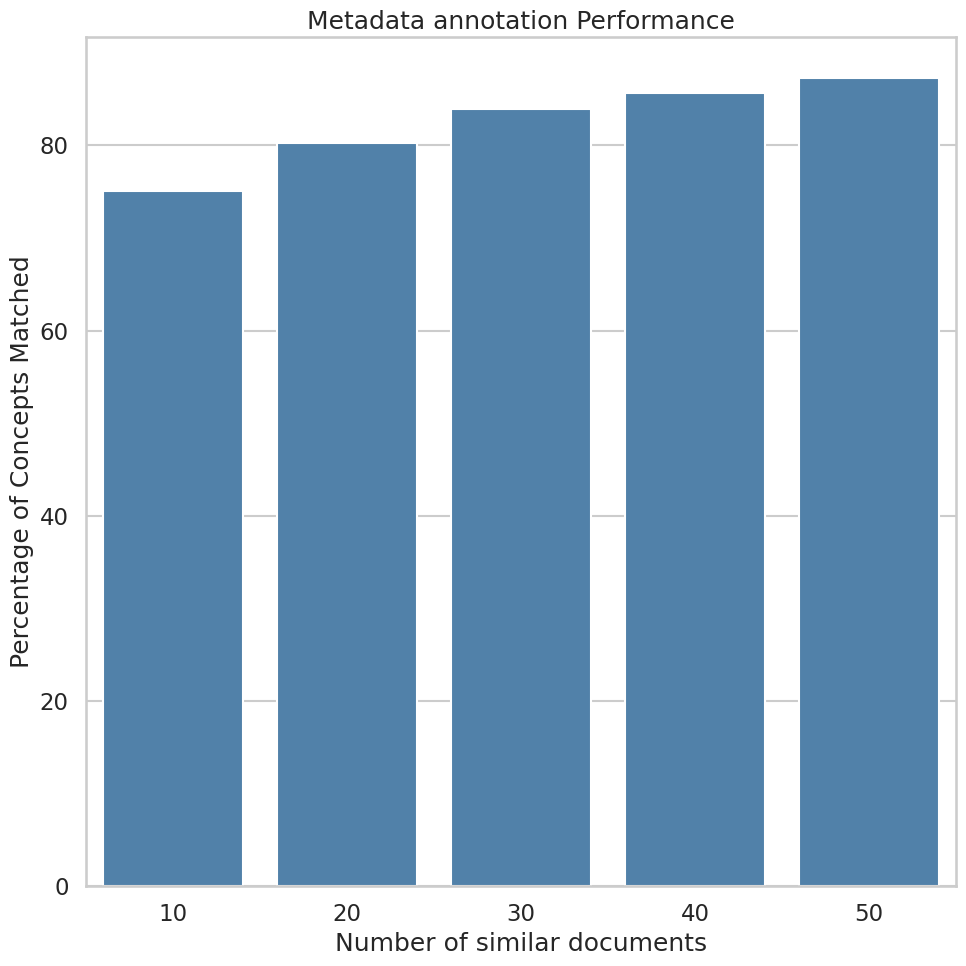

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_palette('deep')
sns.set_context('talk')

sim_docs = [10, 20, 30, 40, 50]
perc_matched = [75.04572418589761, 80.30170295343707, 83.89076081272614, 85.68866586207628, 87.31846509303156]

fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=sim_docs, y=perc_matched, color='steelblue', saturation=0.8, ax=ax)
ax.set_xlabel('Number of similar documents')
ax.set_ylabel('Percentage of Concepts Matched')
ax.set_title('Metadata annotation Performance')
plt.tight_layout()
plt.show()


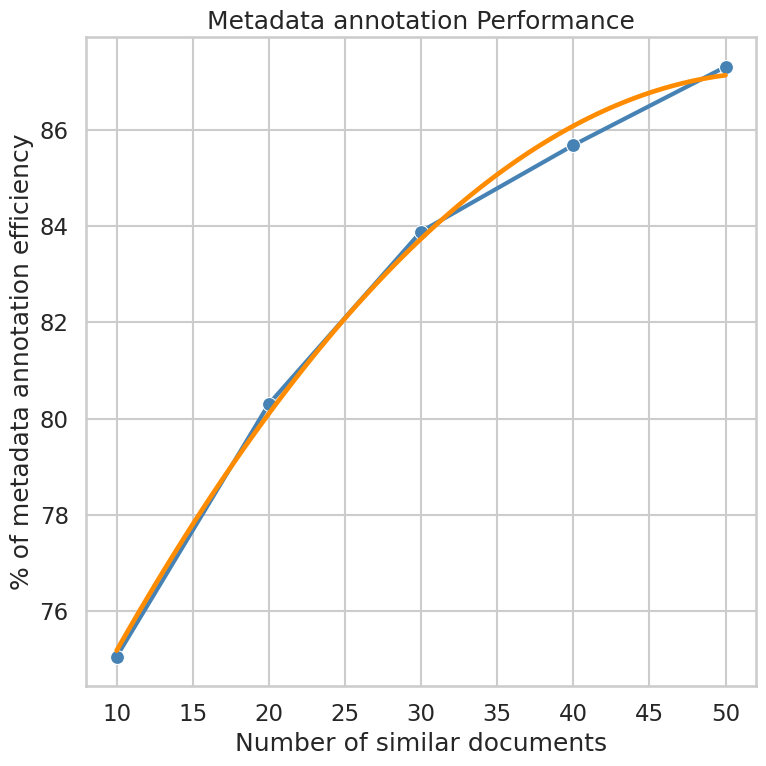

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style('whitegrid')
sns.set_palette('deep')
sns.set_context('talk')

sim_docs = [10, 20, 30, 40, 50]
perc_matched = [75.04572418589761, 80.30170295343707, 83.89076081272614, 85.68866586207628, 87.31846509303156]

fig, ax = plt.subplots(figsize=(8, 8))
sns.lineplot(x=sim_docs, y=perc_matched, color='steelblue', linewidth=3, marker='o', markersize=10, ax=ax)
sns.regplot(x=sim_docs, y=perc_matched, scatter=False, color='darkorange', ax=ax, ci=None, order=2)
ax.set_xlabel('Number of similar documents')
ax.set_ylabel('% of metadata annotation efficiency')
ax.set_title('Metadata annotation Performance')
plt.xticks(np.arange(10, 55, step=5))
plt.tight_layout()
plt.show()


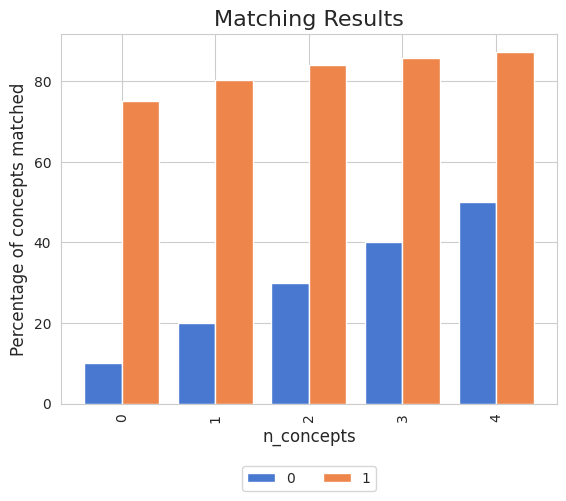

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Convert data to pandas dataframe
df = pd.DataFrame(results.items())

# Set style
sns.set_style("whitegrid")

# Set color palette
colors = sns.color_palette("muted")

# Plot the data
ax = df.plot(kind='bar', width=0.8, color=colors)

# Set the axis labels and title
ax.set_xlabel("n_concepts", fontsize=12)
ax.set_ylabel("Percentage of concepts matched", fontsize=12)
ax.set_title("Matching Results", fontsize=16)

# Set the legend
ax.legend(title=None, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(df.columns))

# Show the plot
plt.show()

In [10]:
# average of elements in seta_eurovoc_concepts_10 list of all rows
import math
for k in top_k:
    print("average number of eurovoc concepts in when sim_doc = {}: ".format(k), math.ceil(df['seta_eurovoc_concepts_'+str(k)].apply(len).sum()/len(df)))

average number of eurovoc concepts in when sim_doc = 10:  40
average number of eurovoc concepts in when sim_doc = 20:  63
average number of eurovoc concepts in when sim_doc = 30:  84
average number of eurovoc concepts in when sim_doc = 40:  102
average number of eurovoc concepts in when sim_doc = 50:  120


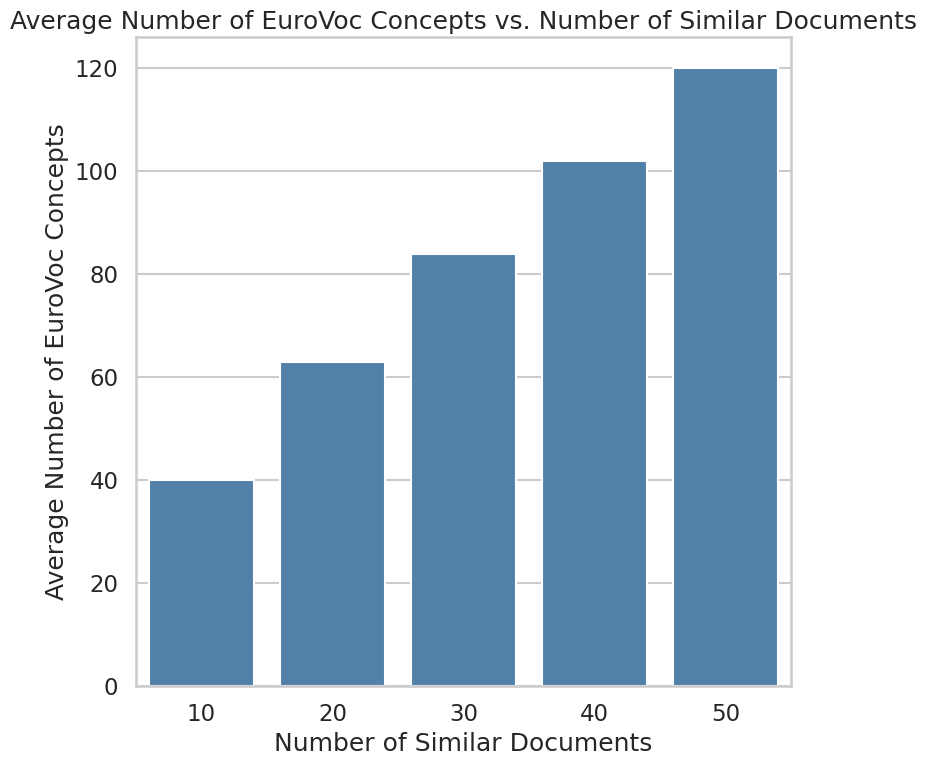

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_palette('husl')
sns.set_context('talk')

sim_docs = [10, 20, 30, 40, 50]
avg_concepts = [40, 63, 84, 102, 120]

fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=sim_docs, y=avg_concepts, color='steelblue', saturation=0.8, ax=ax)
ax.set_xlabel('Number of Similar Documents')
ax.set_ylabel('Average Number of EuroVoc Concepts')
ax.set_title('Average Number of EuroVoc Concepts vs. Number of Similar Documents')
plt.tight_layout()
plt.show()


# 